<a href="https://colab.research.google.com/github/KalpitWalekar/Prepinsta/blob/main/Prepinsta_Week6_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cars Dataset

##Importing Libraries and Files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
doc=pd.read_csv('/content/drive/MyDrive/python_docs/cars_ds_final.csv',index_col=0)
doc.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
doc.shape

(1276, 140)

In [4]:
doc.describe()
doc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 0 to 1275
Columns: 140 entries, Make to Electric_Range
dtypes: float64(6), object(134)
memory usage: 1.4+ MB


##Cleaning Dataset

In [5]:
doc.columns=doc.columns.str.lower().str.replace(" ","_")

In [ ]:
col = pd.DataFrame(doc.columns)
col.columns = [' ']
print("Listing all the columns of the table: ")
print(col.to_string(index=False))

In [128]:
doc.isna().sum()

make                   75
model                   0
variant                 0
ex-showroom_price       0
displacement           12
                     ... 
usb_ports            1247
heads-up_display     1225
welcome_lights       1207
battery              1263
electric_range       1259
Length: 140, dtype: int64

In [7]:
doc['make'].replace("Maruti Suzuki R","Maruti Suzuki",inplace=True)
doc['make'].replace("Land Rover Rover","Land Rover",inplace=True)
doc['make'].value_counts()

Maruti Suzuki    163
Hyundai          130
Mahindra         119
Tata             100
Toyota            82
Honda             64
Skoda             43
Ford              43
Land Rover        37
Bmw               37
Renault           36
Volkswagen        34
Audi              31
Nissan            29
Jeep              28
Fiat              23
Jaguar            22
Kia               21
Volvo             18
Datsun            15
Porsche           14
Mg                13
Lamborghini       13
Icml              11
Mini              10
Lexus             10
Maserati           9
Ferrari            8
Mitsubishi         7
Bentley            6
Force              6
Premier            6
Isuzu              5
Aston Martin       3
Bugatti            2
Bajaj              2
Dc                 1
Name: make, dtype: int64

In [8]:
doc.loc[doc['model'].str.startswith('Mercedes-Benz'), 'make'] = 'Mercedes-Benz'
doc.loc[doc['model'].str.startswith('Rolls-Royce'), 'make'] = 'Rolls-Royce'
doc.loc[doc['model'] == 'Go+', 'make'] = "Datsun"
doc.loc[doc['model'] == 'Go+', 'model'] = "Go Plus"
doc.loc[doc['model'] == 'Wagon', 'model'] = "Wagon R"
doc['model'] = doc.apply(lambda x: x['model'].replace('Rolls-Royce', '') if x['make'] == 'Rolls-Royce' else x['model'], axis=1)
doc['model'] = doc.apply(lambda x: x['model'].replace('Mercedes-Benz', '') if x['make'] == 'Mercedes-Benz' else x['model'], axis=1)
doc['model'] = doc.apply(lambda x: x['model'].strip() if x['make'] == 'Rolls-Royce' else x['model'], axis=1)
doc['model'] = doc.apply(lambda x: x['model'].strip() if x['make'] == 'Mercedes-Benz' else x['model'], axis=1)

In [9]:
#Using this we found all the model names and filled their make names respectively.
doc[doc['make'].isna()]['model']

Series([], Name: model, dtype: object)

In [10]:
#To confirm if the name of the models are all correct
doc['model'].to_string()

'0                      Nano Genx\n1                      Nano Genx\n2                      Nano Genx\n3                      Nano Genx\n4                      Nano Genx\n5                      Nano Genx\n6                        Redi-Go\n7                        Redi-Go\n8                        Redi-Go\n9                        Redi-Go\n10                       Redi-Go\n11                       Redi-Go\n12                          Kwid\n13                          Kwid\n14                          Kwid\n15                          Kwid\n16                          Kwid\n17                          Kwid\n18                          Kwid\n19                          Kwid\n20                          Kwid\n21                          Kwid\n22                          Kwid\n23                          Kwid\n24                          Eeco\n25                          Eeco\n26                          Eeco\n27                          Eeco\n28                          Eeco\n29           

We dont need all the data, thus we will drop columns that don't play a necessary role in choosing the right car.

##Dropping Un-required columns

 List of Important Columns

 'make','model','ex-showroom_price','body_type','displacement', 'cylinders', 'fuel_system', 'fuel_tank_capacity', 'fuel_type',  'city_mileage', 'power', 'torque', 'compression_ratio','seating_capacity','basic_warranty', 'child_safety_locks', 'number_of_airbags', 'parking_assistance',  'navigation_system'

In [11]:
df=doc[['make', 'model', 'ex-showroom_price', 'body_type', 'displacement',
        'cylinders', 'fuel_system', 'fuel_tank_capacity', 'fuel_type',
        'city_mileage', 'power', 'torque','seating_capacity',
        'basic_warranty', 'child_safety_locks', 'number_of_airbags',
        'parking_assistance',  'navigation_system']]
df.isna().sum()

make                    0
model                   0
ex-showroom_price       0
body_type               6
displacement           12
cylinders              66
fuel_system             8
fuel_tank_capacity     69
fuel_type               0
city_mileage          555
power                   0
torque                  2
seating_capacity        6
basic_warranty        440
child_safety_locks     75
number_of_airbags     135
parking_assistance    290
navigation_system     593
dtype: int64

In [13]:
df.dtypes

make                   object
model                  object
ex-showroom_price      object
body_type              object
displacement           object
cylinders             float64
fuel_system            object
fuel_tank_capacity     object
fuel_type              object
city_mileage           object
power                  object
torque                 object
seating_capacity      float64
basic_warranty         object
child_safety_locks     object
number_of_airbags     float64
parking_assistance     object
navigation_system      object
dtype: object

###Extensive Cleaning

In [14]:
df.displacement = df.displacement.str[:-3].astype('float')
df['displacement']=df['displacement'].fillna(0)
df[df['displacement'].isna()]

<ipython-input-14-8f081532d933>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.displacement = df.displacement.str[:-3].astype('float')
<ipython-input-14-8f081532d933>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['displacement']=df['displacement'].fillna(0)


,make,model,ex-showroom_price,body_type,displacement,cylinders,fuel_system,fuel_tank_capacity,fuel_type,city_mileage,power,torque,seating_capacity,basic_warranty,child_safety_locks,number_of_airbags,parking_assistance,navigation_system


In [15]:
df['ex-showroom_price']=df['ex-showroom_price'].apply(lambda x:x.replace('Rs',''))
df['ex-showroom_price']=df['ex-showroom_price'].apply(lambda x:x.replace(',',''))
df['ex-showroom_price']=df['ex-showroom_price'].apply(lambda x:x.replace('.',''))
df['ex-showroom_price']=df['ex-showroom_price'].astype(int)
df['ex-showroom_price']

<ipython-input-15-5e51e68f56b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ex-showroom_price']=df['ex-showroom_price'].apply(lambda x:x.replace('Rs',''))
<ipython-input-15-5e51e68f56b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ex-showroom_price']=df['ex-showroom_price'].apply(lambda x:x.replace(',',''))
<ipython-input-15-5e51e68f56b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

0        292667
1        236447
2        296661
3        334768
4        272223
         ...   
1271    1302000
1272    1421000
1273    1431000
1274    1201000
1275    6862560
Name: ex-showroom_price, Length: 1276, dtype: int64

In [16]:
#parking_assistance
df.loc[(df['parking_assistance'].isna()) & (df['ex-showroom_price'] > 500000), 'parking_assistance'] = "Yes"
df.loc[(df['parking_assistance'].isna()) & (df['ex-showroom_price'] <= 500000), 'parking_assistance'] = "No"
#navigation_system
df.loc[(df['navigation_system'].isna()) & (df['ex-showroom_price'] > 500000), 'navigation_system'] = "Yes"
df.loc[(df['navigation_system'].isna()) & (df['ex-showroom_price'] <= 500000), 'navigation_system'] = "No"
#child_safety_locks
df.loc[(df['child_safety_locks'].isna()) & (df['ex-showroom_price'] > 500000), 'child_safety_locks'] = "Yes"
df.loc[(df['child_safety_locks'].isna()) & (df['ex-showroom_price'] <= 500000), 'child_safety_locks'] = "No"

In [63]:
df.isna().sum()

make                  0
model                 0
ex-showroom_price     0
body_type             0
displacement          0
cylinders             0
fuel_system           0
fuel_tank_capacity    0
fuel_type             0
city_mileage(kmpl)    0
power                 0
torque                0
seating_capacity      0
basic_warranty        0
child_safety_locks    0
number_of_airbags     0
parking_assistance    0
navigation_system     0
dtype: int64

In [19]:
df[df['seating_capacity'].isna()]
df.loc[df['model'] == "Alturas G4", "seating_capacity"] = 7
df.loc[df['model'] == "Tiguan", "seating_capacity"] = 5
df.loc[df['model'] == "Lodgy", "seating_capacity"] = 7
df.loc[df['model'] == "F-Type", "seating_capacity"] = 2
df.loc[df['model'] == "Cayenne Coupe", "seating_capacity"] = 4

In [20]:
df['number_of_airbags'] = df['number_of_airbags'].fillna(6)

<ipython-input-20-b6f6e81fa656>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_of_airbags'] = df['number_of_airbags'].fillna(6)


In [21]:
df['fuel_system'].value_counts()
df[df['fuel_system'].isna()]
df.loc[df['model'] == 'E Verito', 'fuel_system'] = 'Electric'
df.loc[df['model'] == 'Range Sport', 'fuel_system'] = 'Injection'
df.loc[df['model'] == 'Outlander', 'fuel_system'] = 'Injection'
df.loc[df['model'] == 'F-Type', 'fuel_system'] = 'PGM - Fi'
df.loc[df['model'] == 'Kona Electric', 'fuel_system'] = 'Electric'

In [33]:
df['fuel_tank_capacity'] = df['fuel_tank_capacity'].str.split(' ',expand=True).get(0)
#df['fuel_tank_capacity'].value_counts()
df.loc[df['model'] == 'Xc40', 'fuel_tank_capacity'] = 54
df.loc[df['model'] == 'Clubman', 'fuel_tank_capacity'] = 44
df.loc[df['model'] == 'S90', 'fuel_tank_capacity'] = 60
df.loc[df['model'] == 'X5', 'fuel_tank_capacity'] = 83
df.loc[df['model'] == 'Cullinan', 'fuel_tank_capacity'] = 100
df.loc[df['model'] == 'Chiron', 'fuel_tank_capacity'] = 100
df.loc[df['model'] == 'Qute (Re60)', 'fuel_tank_capacity'] = 35
df.loc[df['model'] == 'Dmax V-Cross', 'fuel_tank_capacity'] = 55
df.loc[df['model'] == 'F-Type', 'fuel_tank_capacity'] = 70
df.loc[df['model'] == 'Venue', 'fuel_tank_capacity'] = 45
df.loc[df['model'] == 'E2O Plus', 'fuel_tank_capacity'] = 44
df.loc[df['model'] == 'Abarth Avventura', 'fuel_tank_capacity'] = 45
df.loc[df['model'] == 'E Verito', 'fuel_tank_capacity'] = 50
df.loc[df['model'] == 'Hexa', 'fuel_tank_capacity'] = 60
df.loc[df['model'] == 'Zs Ev', 'fuel_tank_capacity'] = 47
df.loc[df['model'] == 'Carnival', 'fuel_tank_capacity'] = 60
df.loc[df['model'] == 'Range Evoque', 'fuel_tank_capacity'] = 57
df.loc[df['model'] == 'Hector', 'fuel_tank_capacity'] = 60
df.loc[df['model'] == 'Range', 'fuel_tank_capacity'] = 104
df.loc[df['model'] == 'Huracan', 'fuel_tank_capacity'] = 80
df.loc[df['model'] == 'Range Evoque Convertible', 'fuel_tank_capacity'] = 68
df.loc[df['model'] == 'Range Velar', 'fuel_tank_capacity'] = 82
df.loc[df['model'] == 'Range Sport', 'fuel_tank_capacity'] = 86
df.loc[df['model'] == 'Nexon Ev', 'fuel_tank_capacity'] = 44
df.loc[df['model'] == 'Es', 'fuel_tank_capacity'] = 50
df.loc[df['model'] == 'Cls', 'fuel_tank_capacity'] = 90
df.loc[df['model'] == 'Abarth Punto', 'fuel_tank_capacity'] = 45
df.loc[df['model'] == 'Nuvosport', 'fuel_tank_capacity'] = 60
df.loc[df['model'] == 'Kona Electric', 'fuel_tank_capacity'] = 0
df.loc[df['model'] == 'A5', 'fuel_tank_capacity'] = 58
df[df['fuel_tank_capacity'].isna()]['model']

<ipython-input-33-3bbe3123092a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel_tank_capacity'] = df['fuel_tank_capacity'].str.split(' ',expand=True).get(0)


Series([], Name: model, dtype: object)

In [23]:
df['fuel_tank_capacity'].describe()

count     1274
unique      80
top         35
freq       124
Name: fuel_tank_capacity, dtype: object

In [34]:
df[df['torque'].isna()]
df.loc[df['model'] == 'Bolero Power Plus', 'torque'] = '210Nm@1600-2200rpm'
df.loc[df['model'] == '6-Series', 'torque'] = '400Nm@1550-4400rpm'

In [35]:
df[df['basic_warranty'].isna()]['model']

18               Kwid
19               Kwid
23               Kwid
33           Alto K10
34           Alto K10
            ...      
1251              Glc
1252              Glc
1253    Cayenne Coupe
1254    Cayenne Coupe
1275          Montero
Name: model, Length: 440, dtype: object

In [36]:
df['basic_warranty']=df['basic_warranty'].str.split('/',expand=True).get(0)
df['basic_warranty']=df['basic_warranty'].str.split(' ',expand=True).get(0)
df.loc[df['basic_warranty'] == '24', 'basic_warranty'] = 1
df.loc[df['basic_warranty'] == '3rd', 'basic_warranty'] = 3
df.loc[df['model'] == 'Kwid', 'basic_warranty'] = 2
df.loc[df['model'] == 'Alto K10', 'basic_warranty'] = 2
df.loc[df['model'] == 'Santro', 'basic_warranty'] = 3
df.loc[df['model'] == 'Cayenne Coupe', 'basic_warranty'] = 4
df.loc[df['model'] == 'Montero', 'basic_warranty'] = 7
df.loc[df['model'] == 'Tiago', 'basic_warranty'] = 3
df.loc[df['model'] == 'Ignis', 'basic_warranty'] = 2
df.loc[df['model'] == 'Yaris', 'basic_warranty'] = 3
df.loc[df['model'] == 'Triber', 'basic_warranty'] = 2
df.loc[df['model'] == 'Rio', 'basic_warranty'] = 3
df.loc[df['model'] == 'Kona Electric', 'basic_warranty'] = 3
df.loc[df['model'] == 'A5', 'basic_warranty'] = 5
df.loc[df['model'] == 'Ls 500H', 'basic_warranty'] = 3
df.loc[df['model'] == 'Micra Active', 'basic_warranty'] = 2
df.loc[df['model'] == 'Xcent Prime', 'basic_warranty'] = 3
df.loc[df['model'] == 'Kicks', 'basic_warranty'] = 3
df.loc[df['model'] == 'Winger', 'basic_warranty'] = 3
df.loc[df['model'] == 'Bolt', 'basic_warranty'] = 2
df.loc[df['model'] == 'Aura', 'basic_warranty'] = 3
df.loc[df['model'] == 'Nuvosport', 'basic_warranty'] = 3
df.loc[df['model'] == 'Ameo', 'basic_warranty'] = 2
df.loc[df['model'] == 'F-Type', 'basic_warranty'] = 3
df.loc[df['model'] == 'Aspire', 'basic_warranty'] = 1
df.loc[df['model'] == 'Platinum Etios', 'basic_warranty'] = 3
df.loc[df['model'] == 'Urban Cross', 'basic_warranty'] = 3
df.loc[df['model'] == '6-Series', 'basic_warranty'] = 2
df.loc[df['model'] == 'Lx 570', 'basic_warranty'] = 2
df.loc[df['model'] == '458 Spider', 'basic_warranty'] = 3
df.loc[df['model'] == 'Glanza', 'basic_warranty'] = 3
df.loc[df['model'] == 'Creta', 'basic_warranty'] = 3
df.loc[df['model'] == 'Abarth Punto', 'basic_warranty'] = 3
df.loc[df['model'] == 'Outlander', 'basic_warranty'] = 5
df.loc[df['model'] == 'Nexon', 'basic_warranty'] = 3
df.loc[df['model'] == 'Compass', 'basic_warranty'] = 3
df.loc[df['model'] == 'Vitara Brezza', 'basic_warranty'] = 2
df.loc[df['make'].str.startswith('Mercedes-Benz'), 'basic_warranty'] = 3
df.loc[df['make'].str.startswith('Rolls-Royce'), 'basic_warranty'] = 4
df.loc[df['model'] == 'Verna', 'basic_warranty'] = 3
df.loc[df['model'] == 'Seltos', 'basic_warranty'] = 3
df.loc[df['model'] == 'S-Presso', 'basic_warranty'] = 2
df.loc[df['model'] == 'R8', 'basic_warranty'] = 4
df.loc[df['model'] == 'Xuv300', 'basic_warranty'] = 3
df.loc[df['model'] == 'Tucson', 'basic_warranty'] = 3
df.loc[df['model'] == 'Compass Trailhawk', 'basic_warranty'] = 3
df.loc[df['model'] == 'Venue', 'basic_warranty'] = 3
df.loc[df['model'] == 'Hector', 'basic_warranty'] = 3
df.loc[df['model'] == 'John Cooper Works', 'basic_warranty'] = 4
df.loc[df['model'] == 'Hector', 'basic_warranty'] = 3
df.loc[df['model'] == 'Hector', 'basic_warranty'] = 3
df.loc[(df['basic_warranty'].isna()), 'basic_warranty'] = 5
df.loc[df['model'] == 'Hector', 'basic_warranty'] = 3
df.loc[df['model'] == 'Hector', 'basic_warranty'] = 3
df.loc[df['model'] == 'Hector', 'basic_warranty'] = 3
df.loc[df['model'] == 'Hector', 'basic_warranty'] = 3
df['basic_warranty']=df['basic_warranty'].astype(int)
df['basic_warranty'].value_counts()

<ipython-input-36-07c37d939d37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['basic_warranty']=df['basic_warranty'].str.split('/',expand=True).get(0)
<ipython-input-36-07c37d939d37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['basic_warranty']=df['basic_warranty'].str.split(' ',expand=True).get(0)
<ipython-input-36-07c37d939d37>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

3    560
2    496
5    165
1     33
4     18
8      3
7      1
Name: basic_warranty, dtype: int64

In [37]:
#df[df['body_type'].isna()]
df.loc[df['model'] == 'Alturas G4', 'body_type'] = "SUV"
df.loc[df['model'] == 'Ghibli', 'body_type'] = "Sedan, Crossover"
df.loc[df['model'] == 'Cayenne Coupe', 'body_type'] = "Coupe"
df['body_type'].value_counts()

SUV                    448
Sedan                  333
Hatchback              316
Coupe                   43
MUV                     39
MPV                     39
Convertible             20
Crossover               18
Sedan, Crossover         4
Pick-up                  3
Sports                   3
Sedan, Coupe             2
Crossover, SUV           2
SUV, Crossover           2
Sports, Convertible      2
Sports, Hatchback        1
Coupe, Convertible       1
Name: body_type, dtype: int64

In [38]:
df.rename(columns={"city_mileage":"city_mileage(kmpl)"}, inplace=True)
df.head()

<ipython-input-38-f223b1fdd280>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"city_mileage":"city_mileage(kmpl)"}, inplace=True)


,make,model,ex-showroom_price,body_type,displacement,cylinders,fuel_system,fuel_tank_capacity,fuel_type,city_mileage(kmpl),power,torque,seating_capacity,basic_warranty,child_safety_locks,number_of_airbags,parking_assistance,navigation_system
0,Tata,Nano Genx,292667,Hatchback,624.0,2.0,Injection,24,Petrol,?23.6 km/litre,38PS@5500rpm,51Nm@4000rpm,4.0,2,Yes,6.0,No,No
1,Tata,Nano Genx,236447,Hatchback,624.0,2.0,Injection,24,Petrol,?23.6 km/litre,38PS@5500rpm,51Nm@4000rpm,4.0,2,Yes,6.0,No,No
2,Tata,Nano Genx,296661,Hatchback,624.0,2.0,Injection,15,CNG,NaN,38PS@5500rpm,51Nm@4000rpm,4.0,2,Yes,6.0,No,No
3,Tata,Nano Genx,334768,Hatchback,624.0,2.0,Injection,24,Petrol,?23.6 km/litre,38PS@5500rpm,51Nm@4000rpm,4.0,2,Yes,6.0,No,No
4,Tata,Nano Genx,272223,Hatchback,624.0,2.0,Injection,24,Petrol,?23.6 km/litre,38PS@5500rpm,51Nm@4000rpm,4.0,2,Yes,6.0,No,No


In [53]:
df['city_mileage(kmpl)'] = df['city_mileage(kmpl)'].str.split(' ',expand=True).get(0)
df.loc[df['city_mileage(kmpl)'] == '?23.6', 'city_mileage(kmpl)'] = '23.6'
df.loc[df['city_mileage(kmpl)'] == '12.5-12.7', 'city_mileage(kmpl)'] = '12.6'
df.loc[df['city_mileage(kmpl)'] == '26032', 'city_mileage(kmpl)'] = '26.32'

<ipython-input-53-6213c4c07c2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city_mileage(kmpl)'] = df['city_mileage(kmpl)'].str.split(' ',expand=True).get(0)


In [57]:
df.loc[df['make'] == "Skoda" ,"city_mileage(kmpl)" ] = 19.0
df.loc[df['make'] == "Maruti Suzuki" ,"city_mileage(kmpl)" ] = 18.0
df.loc[df['make'] == "Tata" ,"city_mileage(kmpl)" ] = 20.0
df.loc[df['make'] == "Mercedes-Benz" ,"city_mileage(kmpl)" ] = 15.0
df.loc[df['make'] == "Porsche" ,"city_mileage(kmpl)" ] = 11.0
df.loc[df['make'] == "Datsun" ,"city_mileage(kmpl)" ] = 21.0
df.loc[df['make'] == "Hyundai" ,"city_mileage(kmpl)" ] = 21.0
df.loc[df['make'] == "Toyota" ,"city_mileage(kmpl)" ] = 17.0
df.loc[df['make'] == "Renault" ,"city_mileage(kmpl)" ] = 14.0
df.loc[df['make'] == "Land Rover" ,"city_mileage(kmpl)" ] = 11.0
df.loc[df['make'] == "Nissan" ,"city_mileage(kmpl)" ] = 18.0
df.loc[df['make'] == "Lexus" ,"city_mileage(kmpl)" ] = 12.0
df.loc[df['make'] == "Ford" ,"city_mileage(kmpl)" ] = 26.0
df.loc[df['make'] == "Jaguar" ,"city_mileage(kmpl)" ] = 19.0
df.loc[df['make'] == "Bmw" ,"city_mileage(kmpl)" ] = 18.0
df.loc[df['make'] == "Audi" ,"city_mileage(kmpl)" ] = 17.0
df.loc[df['make'] == "Volkswagen" ,"city_mileage(kmpl)" ] = 20.0
df.loc[df['make'] == "Honda" ,"city_mileage(kmpl)" ] = 19.0
df.loc[df['make'] == "Jeep" ,"city_mileage(kmpl)" ] = 17.0
df.loc[df['make'] == "Mini" ,"city_mileage(kmpl)" ] = 17.0
df.loc[df['make'] == "Ferrari" ,"city_mileage(kmpl)" ] = 9.0
df.loc[df['make'] == "Mahindra" ,"city_mileage(kmpl)" ] = 19.0
df.loc[df['city_mileage(kmpl)'] == '8.6' ,"city_mileage(kmpl)" ] = 8.6
df.loc[df['city_mileage(kmpl)'] == '13' ,"city_mileage(kmpl)" ] = 13.0
df.loc[df['city_mileage(kmpl)'] == '5' ,"city_mileage(kmpl)" ] = 5.0
df.loc[df['city_mileage(kmpl)'] == '12' ,"city_mileage(kmpl)" ] = 12.0
df.loc[df['city_mileage(kmpl)'] == '20' ,"city_mileage(kmpl)" ] = 20.0
df.loc[df['city_mileage(kmpl)'] == '6' ,"city_mileage(kmpl)" ] = 6.0
df.loc[df['city_mileage(kmpl)'] == '8' ,"city_mileage(kmpl)" ] = 8.0
df.loc[df['city_mileage(kmpl)'] == '13.8' ,"city_mileage(kmpl)" ] = 13.8
df.loc[df['make'] == "Volvo" ,"city_mileage(kmpl)" ] = 17.0
df.loc[df['make'] == "Mg" ,"city_mileage(kmpl)" ] = 14.0
df.loc[df['make'] == "Mitsubishi" ,"city_mileage(kmpl)" ] = 14.0
df.loc[df['make'] == "Lamborghini" ,"city_mileage(kmpl)" ] = 8.0
df.loc[df['make'] == "Bentley" ,"city_mileage(kmpl)" ] = 13.0
df.loc[df['make'] == "Rolls-Royce" ,"city_mileage(kmpl)" ] = 10.0
df.loc[df['make'] == "Bajaj" ,"city_mileage(kmpl)" ] = 35.0
df.loc[df['make'] == "Bugatti" ,"city_mileage(kmpl)" ] = 4.0
df.loc[df['make'] == "Force" ,"city_mileage(kmpl)" ] = 11.0
df.loc[df['make'] == "Kia" ,"city_mileage(kmpl)" ] = 23.0
df.loc[df['make'] == "Maserati" ,"city_mileage(kmpl)" ] = 9.0
df.loc[df['make'] == "Fiat" ,"city_mileage(kmpl)" ] = 18.0
df.loc[df['make'] == "Premier" ,"city_mileage(kmpl)" ] = 12.5
df.loc[df['make'] == "Isuzu" ,"city_mileage(kmpl)" ] = 12.4
df.loc[df['make'] == "Dc" ,"city_mileage(kmpl)" ] = 10.0
df.loc[df['make'] == "Aston Martin" ,"city_mileage(kmpl)" ] = 10.1
df.loc[df['make'] == "Icml" ,"city_mileage(kmpl)" ] = 17.0
df['city_mileage(kmpl)'] = df['city_mileage(kmpl)'].astype(float)
df[df['city_mileage(kmpl)'].isna()]

<ipython-input-57-dfea13788642>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city_mileage(kmpl)'] = df['city_mileage(kmpl)'].astype(float)


,make,model,ex-showroom_price,body_type,displacement,cylinders,fuel_system,fuel_tank_capacity,fuel_type,city_mileage(kmpl),power,torque,seating_capacity,basic_warranty,child_safety_locks,number_of_airbags,parking_assistance,navigation_system


In [59]:
df['city_mileage(kmpl)'].describe()

count    1276.000000
mean       17.938323
std         3.446701
min         4.000000
25%        17.000000
50%        18.000000
75%        20.000000
max        35.000000
Name: city_mileage(kmpl), dtype: float64

In [60]:
df.loc[df['model'] == 'Aura', 'cylinders'] = 4
df.loc[df['model'] == 'F-Type', 'cylinders'] = 8
df.loc[df['model'] == 'Nexon Ev', 'cylinders'] = 3
df.loc[df['model'] == 'Kona Electric', 'cylinders'] = 0
df.loc[df['model'] == 'Ghibli', 'cylinders'] = 6
df.loc[df['model'] == 'Zs Ev', 'cylinders'] = 0
df.loc[df['model'] == 'Seltos', 'cylinders'] = 4
df.loc[df['model'] == 'Lx 570', 'cylinders'] = 8
df.loc[df['model'] == 'Wr-V', 'cylinders'] = 4
df.loc[df['model'] == 'Ameo', 'cylinders'] = 3
df.loc[df['model'] == 'Xuv300', 'cylinders'] = 4
df.loc[df['model'] == 'Qute (Re60)', 'cylinders'] = 1
df.loc[df['model'] == 'Cr-V', 'cylinders'] = 4
df.loc[df['model'] == 'E Verito', 'cylinders'] = 4
df.loc[df['model'] == 'Tigor Ev', 'cylinders'] = 3
df.loc[df['model'] == 'E2O Plus', 'cylinders'] = 4
df.loc[df['model'] == 'Hexa', 'cylinders'] = 4
df.loc[df['model'] == 'Lx 450D', 'cylinders'] = 8

In [30]:
df[df['cylinders'].isna()]

,make,model,ex-showroom_price,body_type,displacement,cylinders,fuel_system,fuel_tank_capacity,fuel_type,city_mileage(kmpl),power,torque,seating_capacity,basic_warranty,child_safety_locks,number_of_airbags,parking_assistance,navigation_system


In [61]:
df['cylinders'] = df['cylinders'].astype(int)
df['cylinders'].value_counts()

<ipython-input-61-91e1c47293e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cylinders'] = df['cylinders'].astype(int)


4     832
3     224
6     106
8      60
12     21
5      10
10     10
2       6
0       3
16      2
1       2
Name: cylinders, dtype: int64

In [62]:
df

,make,model,ex-showroom_price,body_type,displacement,cylinders,fuel_system,fuel_tank_capacity,fuel_type,city_mileage(kmpl),power,torque,seating_capacity,basic_warranty,child_safety_locks,number_of_airbags,parking_assistance,navigation_system
0,Tata,Nano Genx,292667,Hatchback,624.0,2,Injection,24,Petrol,20.0,38PS@5500rpm,51Nm@4000rpm,4.0,2,Yes,6.0,No,No
1,Tata,Nano Genx,236447,Hatchback,624.0,2,Injection,24,Petrol,20.0,38PS@5500rpm,51Nm@4000rpm,4.0,2,Yes,6.0,No,No
2,Tata,Nano Genx,296661,Hatchback,624.0,2,Injection,15,CNG,20.0,38PS@5500rpm,51Nm@4000rpm,4.0,2,Yes,6.0,No,No
3,Tata,Nano Genx,334768,Hatchback,624.0,2,Injection,24,Petrol,20.0,38PS@5500rpm,51Nm@4000rpm,4.0,2,Yes,6.0,No,No
4,Tata,Nano Genx,272223,Hatchback,624.0,2,Injection,24,Petrol,20.0,38PS@5500rpm,51Nm@4000rpm,4.0,2,Yes,6.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Honda,City,1302000,Sedan,1498.0,4,Injection,40,Diesel,19.0,100PS@3600rpm,200Nm@1750rpm,5.0,2,Yes,2.0,Front and rear sensors with camera,Yes
1272,Honda,City,1421000,Sedan,1498.0,4,Injection,40,Diesel,19.0,100PS@3600rpm,200Nm@1750rpm,5.0,2,Yes,6.0,Rear sensors with camera,Yes
1273,Honda,City,1431000,Sedan,1497.0,4,Injection,40,Petrol,19.0,119PS@6600rpm,145Nm@4600rpm,5.0,2,Yes,6.0,Rear sensors with camera,Yes
1274,Honda,City,1201000,Sedan,1497.0,4,Injection,40,Petrol,19.0,119PS@6600rpm,145Nm@4600rpm,5.0,2,Yes,2.0,Front and rear sensors with camera,Yes


##Deriving Insights

In [64]:
cars = df.make.value_counts().nlargest(5)
print(' Here are the top 5 car companies on the basis of number of cars in the market:')
print(f"{cars}")

 Here are the top 5 car companies on the basis of number of cars in the market:
Maruti Suzuki    163
Hyundai          130
Mahindra         119
Tata             100
Toyota            82
Name: make, dtype: int64


In [65]:
df['city_mileage(kmpl)'].describe()

count    1276.000000
mean       17.938323
std         3.446701
min         4.000000
25%        17.000000
50%        18.000000
75%        20.000000
max        35.000000
Name: city_mileage(kmpl), dtype: float64

In [66]:
df['fuel_tank_capacity'].describe()

count     1276
unique      81
top         35
freq       124
Name: fuel_tank_capacity, dtype: object

In [67]:
print(round(df['ex-showroom_price'].describe()))

count         1276.0
mean       4596538.0
std       12147347.0
min         236447.0
25%         743876.0
50%        1060064.0
75%        2979828.0
max      212155397.0
Name: ex-showroom_price, dtype: float64


In [68]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,ex-showroom_price,displacement,cylinders,city_mileage(kmpl),seating_capacity,basic_warranty,number_of_airbags
ex-showroom_price,1.000000,0.783743,0.812148,-0.537281,-0.311343,0.245181,0.300430
displacement,0.783743,1.000000,0.886081,-0.577215,-0.157723,0.262138,0.485483
cylinders,0.812148,0.886081,1.000000,-0.566205,-0.312690,0.232602,0.389201
city_mileage(kmpl),-0.537281,-0.577215,-0.566205,1.000000,0.130720,-0.251332,-0.346479
seating_capacity,-0.311343,-0.157723,-0.312690,0.130720,1.000000,-0.120142,0.022638
basic_warranty,0.245181,0.262138,0.232602,-0.251332,-0.120142,1.000000,0.259589
number_of_airbags,0.300430,0.485483,0.389201,-0.346479,0.022638,0.259589,1.000000


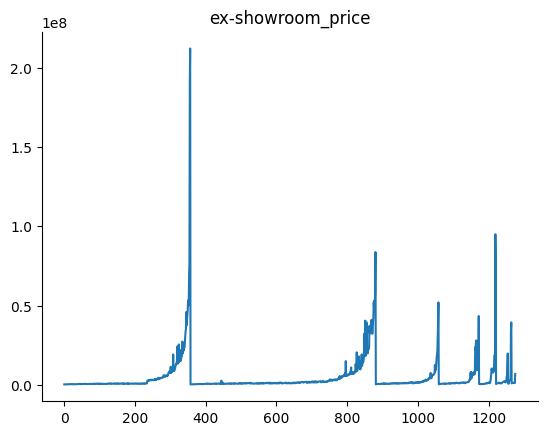

In [69]:
df['ex-showroom_price'].plot(kind='line', title='ex-showroom_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='make'>

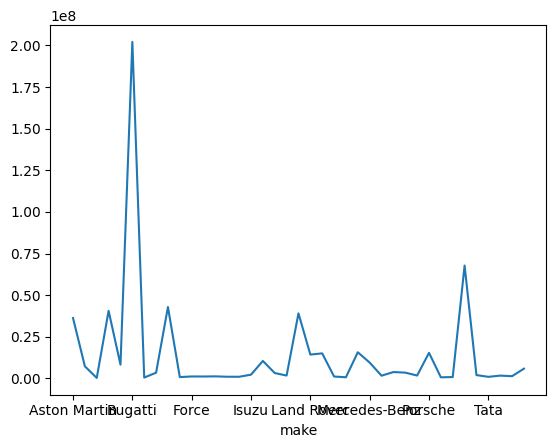

In [70]:
df.groupby('make')['ex-showroom_price'].mean().plot(kind='line')

<Axes: xlabel='cylinders', ylabel='Count'>

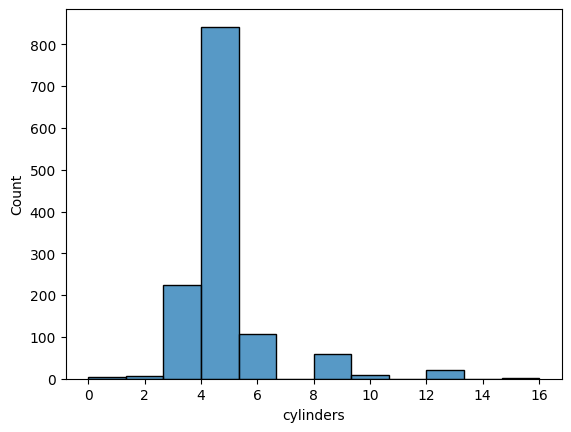

In [71]:
sb.histplot(df['cylinders'])

Text(0.5, 0.98, 'No. of Cars by Company')

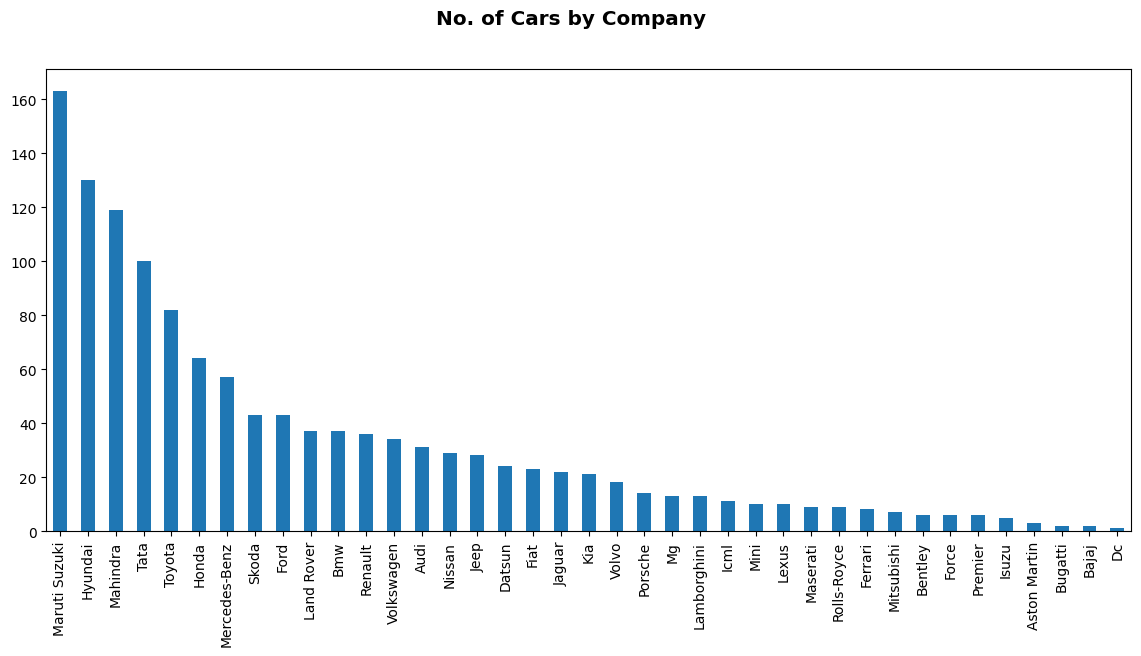

In [72]:
plt.figure(figsize=(14,6))
df.make.value_counts().plot.bar()
plt.suptitle('No. of Cars by Company', weight='heavy', size='x-large')

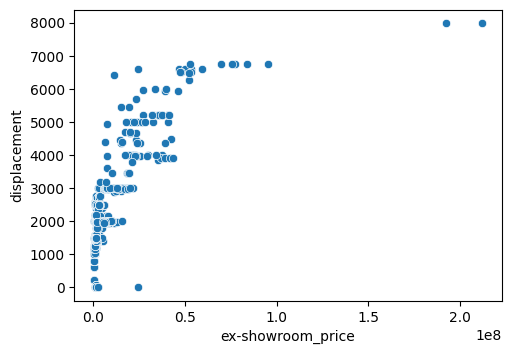

In [73]:
fig, axes = plt.subplots(1, figsize=(5,3.5))
plt.tight_layout()
sb.scatterplot(df, x='ex-showroom_price', y='displacement')
plt.subplots_adjust(wspace=0.3)
plt.show()

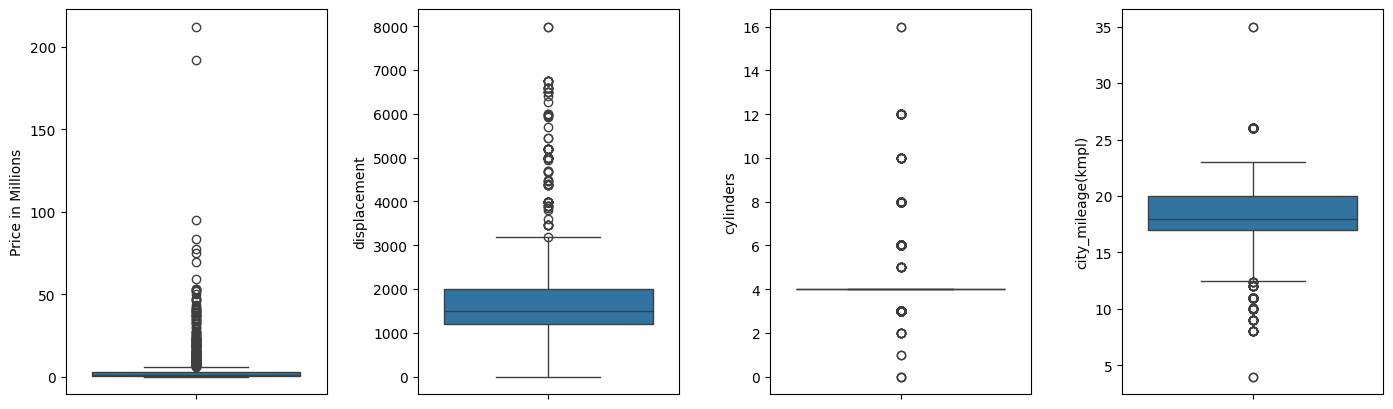

In [74]:
fig, axes = plt.subplots(1,4, figsize=(17,5))
sb.boxplot(df['ex-showroom_price']/1e6, ax=axes[0]).set_ylabel('Price in Millions')
sb.boxplot(df['displacement'], ax=axes[1])
sb.boxplot(df['cylinders'], ax=axes[2])
sb.boxplot(df['city_mileage(kmpl)'], ax=axes[3])
plt.subplots_adjust(wspace=0.35)

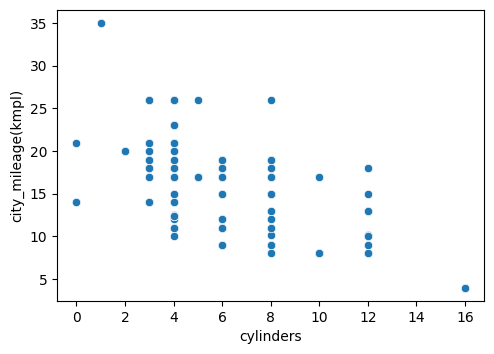

In [75]:
fig, axes = plt.subplots(1, figsize=(5,3.5))
plt.tight_layout()
sb.scatterplot(df, x='cylinders', y='city_mileage(kmpl)')
plt.subplots_adjust(wspace=0.3)
plt.show()

Listing car models that have higher mileage than the avg. car mileage and lesser than price than avg. price

In [76]:
good_mileage = df[df['city_mileage(kmpl)'] > df['city_mileage(kmpl)'].mean()]
eco_cars = df[df['ex-showroom_price'] < df['ex-showroom_price'].mean()]
eco_mileage = list(set(good_mileage['model'].to_list()) & set(eco_cars['model'].to_list()))
print('Cars which are economical and give good Mileage: ')
print(eco_mileage)

Cars which are economical and give good Mileage: 
['Wagon R', 'Nexon', 'Bolero Power Plus', 'Ignis', 'E Verito', 'Freestyle', 'Celerio Tour', 'Bolt', 'Tigor', 'Vitara Brezza', 'X1', 'Figo', 'Xylo', 'Verna', 'Kodiaq Scout', 'Aura', 'Thar', 'S-Cross', 'Tuv300', 'Ciaz', 'Xe', 'Creta', 'Redi-Go', 'Avventura', 'Celerio', 'Rapid', 'Passat', 'Jazz', 'Bolero', 'Xuv500', 'Tigor Ev', 'Micra Active', 'Tucson', 'Venue', 'Grand I10', 'Terrano', 'Tuv300 Plus', 'Linea', 'Alturas G4', 'Baleno Rs', 'City', 'Abarth Avventura', 'Punto Evo', 'E2O Plus', 'Xl6', 'Altroz', 'Tiago Nrg', 'Marazzo', 'Alto 800 Tour', 'Hexa', 'Scorpio', 'Dzire Tour', 'Qute (Re60)', 'Xcent Prime', 'Grand I10 Nios', 'Go Plus', 'Omni', 'Ertiga', 'Monte Carlo', 'Elantra', 'Alto K10', 'Winger', 'Accord Hybrid', 'Micra', 'Celerio X', '3-Series', 'Ecosport', 'Civic', 'Santro', 'S-Presso', 'Zest', 'Sunny', 'Endeavour', 'Linea Classic', 'Baleno', 'Nexon Ev', 'Carnival', 'Polo', 'Superb', 'Punto Evo Pure', 'Seltos', 'Harrier', 'Tiago', 'Ku

Listing car models that have higher mileage than the avg. car mileage and lesser than price than avg. price with more than *Five airbags* and *Three years* of basic warranty.

In [77]:
airbag = df[df['number_of_airbags'] > 5]
good_warranty = df[df['basic_warranty'] > 3]
Cars_choose = list(set(eco_mileage) & set(airbag['model'].to_list()) & set(good_warranty['model'].to_list()))
print("Cars which are economical and comes with good warranty and no. of airbags and mileage:")
print(Cars_choose)

Cars which are economical and comes with good warranty and no. of airbags and mileage:
['Alturas G4', 'Endeavour', 'Tigor', 'Kodiaq Scout', 'Alto 800 Tour', 'Tiguan', 'Superb', 'Hexa', 'Punto Evo Pure', 'Scorpio', 'Xe', 'Qute (Re60)', 'Elantra', 'Superb Sportline', 'Grand I10 Prime', '3-Series', 'Civic', 'Cr-V', 'Alto']


In [80]:
#Listing most expensive cars
df.sort_values('ex-showroom_price', ascending=False).head(20)[['make','model']]

,make,model
356,Bugatti,Chiron
355,Bugatti,Chiron
1219,Rolls-Royce,Phantom
880,Rolls-Royce,Drophead Coupe
354,Rolls-Royce,Phantom Coupe
1220,Rolls-Royce,Phantom
353,Rolls-Royce,Cullinan
879,Rolls-Royce,Dawn
350,Rolls-Royce,Ghost Series Ii
877,Lamborghini,Aventador


#Thank You